In [1]:
 ##http://ramiro.org/notebook/basemap-choropleth/
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize=(10,20))
m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-180., llcrnrlat=-85., urcrnrlon=180., urcrnrlat=85.)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()

C:\Users\DCUK\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\DCUK\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


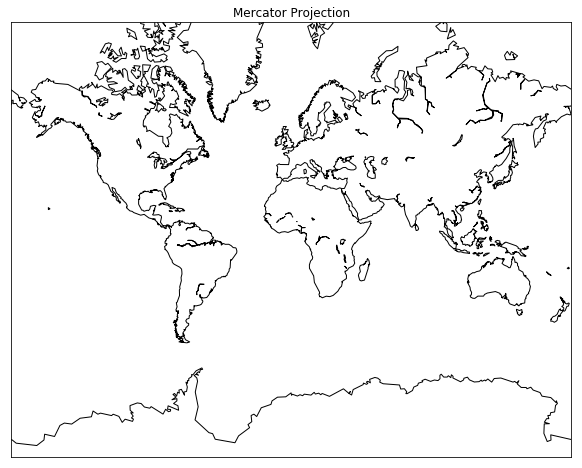

In [2]:
fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
plt.title("Mercator Projection")
plt.show()


In [38]:
import pycountry
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from geonamescache import GeonamesCache
gc = GeonamesCache()
iso3_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

cols = ['country', 'z']
df = pd.read_csv("c:/Users/DCUK/.PyCharmCE2018.1/PycharmProjects/Aspnet_user/country_map.csv", usecols=cols)
df["country"] = df["country"].str.title()
df = df.replace("Bolivia", 'Bolivia, Plurinational State of')
df = df.replace("Uk", "United Kingdom")
df = df.replace("Usa", "United States")
df = df.replace("Isle Of Man", 'Isle of Man')
df = df.replace('Korea', 'Korea, Republic of')
df = df.replace('Curaã§Ao', 'Curaçao')
df = df.replace('Trinidad And Tobago', 'Trinidad and Tobago')
df = df.replace('Tanzania', 'Tanzania, United Republic of')
df = df.replace('Vietnam', 'Viet Nam')
df = df.replace('Iran', 'Iran, Islamic Republic of')
df = df.replace('Virgin Islands', 'Virgin Islands, U.S.')
df = df.replace('Czech Republic', 'Czechia')
df = df.replace('Saint Barthã©Lemy', 'Saint Barthélemy')
input_countries = df["country"]
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
codes = [countries.get(country, 'Unknown code') for country in input_countries]
df = df.assign(code = codes)
values = df['z']
cm = plt.get_cmap('Greens')
num_colors = 1000
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
df['bin'] = np.digitize(values, bins) - 1
df.set_index('code', inplace=True)
df = df.ix[iso3_codes].dropna()
df.sort_values('bin', ascending=False).head(10)

C:\Users\DCUK\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\DCUK\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


,country,z,bin
code,,,
GBR,United Kingdom,21363.0,999.0
USA,United States,1616.0,75.0
IND,India,774.0,36.0
CAN,Canada,430.0,20.0
AUS,Australia,374.0,17.0
IRL,Ireland,254.0,11.0
USA,United States,224.0,10.0
ZAF,South Africa,138.0,6.0
PAK,Pakistan,118.0,5.0


C:\Users\DCUK\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


(255,
 5,
 [-179.99999999999991, -89.99999999999994, 0.0, 0.0],
 [180.0, 83.63410065300008, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x242f5721278>)

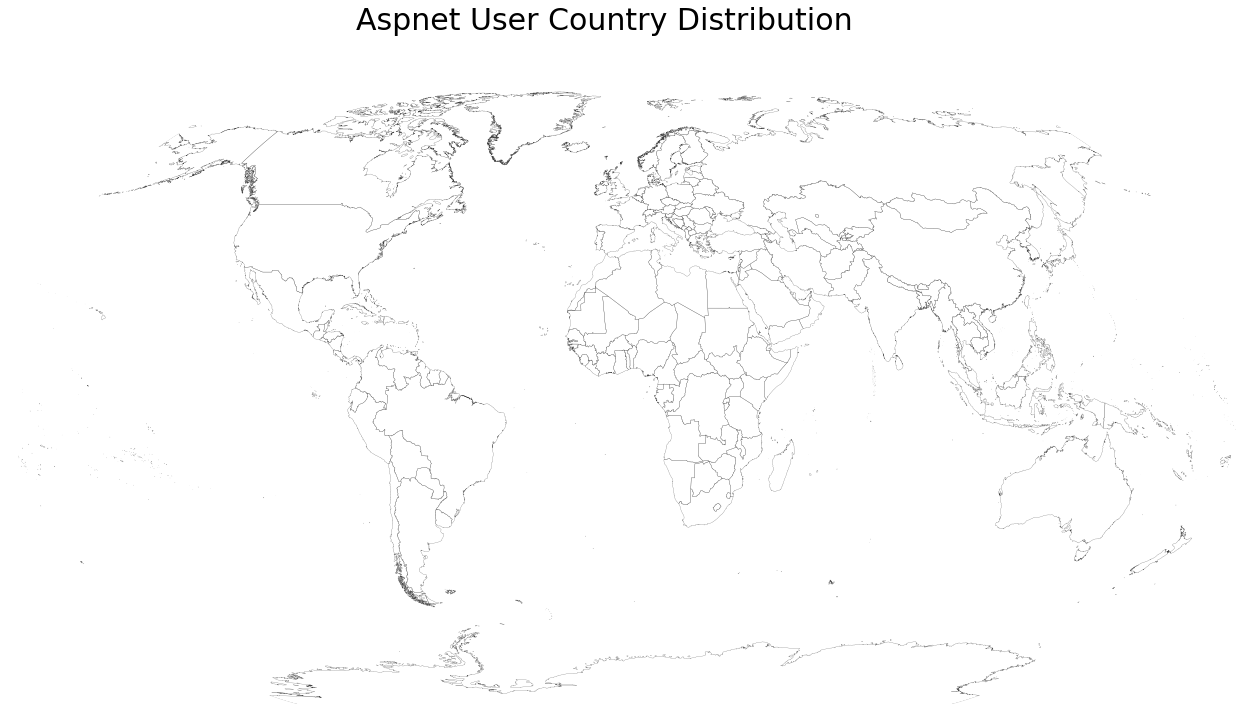

In [39]:

fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(111, frame_on=False)
fig.suptitle('Aspnet User Country Distribution', fontsize=30, y=.95)
m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')
m.readshapefile('c:/Users/DCUK/Downloads/ne_10m_admin_0_countries/ne_10m_admin_0_countries', 'areas', color='#444444', linewidth=.2)

In [59]:
df1 = df.assign(code = 'code')
df1
for info, shape in zip(m.areas_info, m.areas):
    iso3 = info['ADM0_A3']
    if iso3 not in df.index:
        color = '#dddddd'
    else:
        color = scheme[df1.loc[[iso3],['bin']]

    patches = Polygon(np.array(shape), True)
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)

# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

# Draw color legend.
ax_legend = fig.add_axes([100, 200, 500, 1000], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=z, boundaries=z, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in z])

plt.show()

SyntaxError: invalid syntax (<ipython-input-59-53eae1bd3002>, line 10)

In [57]:
df1 = df.assign(code = df.index)
df1 = df1.set_index('bin')
df1

,country,z,code
bin,,,
2,United Arab Emirates,53.0,ARE
0,Anguilla,1.0,AIA
0,Albania,6.0,ALB
0,Austria,10.0,AUT
17,Australia,374.0,AUS
0,Azerbaijan,2.0,AZE
0,Barbados,3.0,BRB
1,Bangladesh,31.0,BGD
0,Belgium,20.0,BEL
